# Wine Classification using Neural Network.
# Author: Huygens Ravelomanana
# Description
We create a small neural network that classifies different types of winee and evaluate the result.<br>
We use data from "https://storage.googleapis.com/nicksdemobucket/wines.csv".
The column "Class" contains the label.

# Importing basic libraries

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

sns.set(style="whitegrid")

# setting seed in order to be able to reproduce result when using "random" operations
np.random.seed(1)

# Loading data - data exploration - preparation

In [3]:
# getting the data from google api using Linux/Unix  wget shell command
# by prefixing the command with exclamation mark (!)

!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2021-07-13 16:58:42--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.176, 172.217.13.208, 172.217.13.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv.13’

wines.csv.13        100%[===================>]  10.70K  --.-KB/s    in 0s      

2021-07-13 16:58:42 (43.4 MB/s) - ‘wines.csv.13’ saved [10957/10957]



In [4]:
# load the data in a pandas DataFrame
df = pd.read_csv('wines.csv')

# visualizing the DataFrame
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# checking the shape of the data
df.shape

(178, 14)

In [6]:
# checking for missing values
df.isnull().any()

Class                           False
Alcohol                         False
Malic_acid                      False
Ash                             False
Alcalinity_of_ash               False
Magnesium                       False
Total_phenols                   False
Flavanoids                      False
Nonflavanoid_phenols            False
Proanthocyanins                 False
Color_intensity                 False
Hue                             False
OD280-OD315_of_diluted_wines    False
Proline                         False
dtype: bool

In [7]:
# checking the datatypes of each column
df.dtypes

Class                             int64
Alcohol                         float64
Malic_acid                      float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
OD280-OD315_of_diluted_wines    float64
Proline                           int64
dtype: object

In [8]:
# looking at the statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


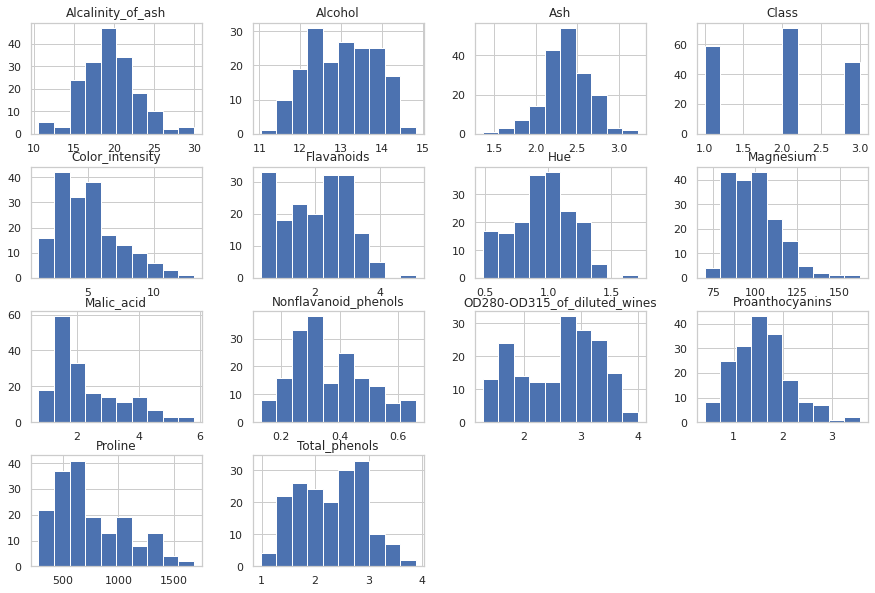

In [9]:
# looking at the histogram of each column
_ = df.hist(figsize=(15,10))

## Comment
- After exploration we will choose not the normalize, rescal, or modify the raw data.

# Creating the target and features - Creating train and test set

In [10]:
# creating the features
# we use the attribute values in order to get a numpy.ndarray
# instead of a pandas  DataFrame or Series
X = df.drop('Class', axis=1).values

# creating the target
# same comment as above
y = df['Class'].values

In [11]:
# importing scikit learn library for splitting the data into train and test
from sklearn.model_selection import train_test_split

# splitting the data into train and test
# we have a small data so we are going to use only 10%  of the data for testing
# we are setting a random seed via random_state=1 in order to get reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)


In [12]:
# looking at the shape of the train and test data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\t')

(160, 13)	(18, 13)	(160,)	(18,)


# Training part

## Importing the relevant libraries

In [13]:
import tensorflow as tf
#import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Creating a model

In [14]:
### setting a global random seed for tensor flow in order to get reproducible results
tf.random.set_seed(1)


# the model will be a sequential neural network
# with 13 input, 3 outputs and some hidden layer in between
model = Sequential(name="wine_model")

#Dense means fully connected

# adding first layer : input
model.add(Dense(13, input_dim=13, activation='relu'))

# hidden layer(s)
# we choose the width to be twice the number features
# and the depth to be 3, this is best configuration we found after multiple trials
model.add(Dense(26, activation='relu')) # adding hidden layer 1
model.add(Dense(26, activation='relu')) # adding hidden layer 2
model.add(Dense(26, activation='relu')) # adding hidden layer 3

# adding last layer : output
# we use softmax activation function since we are doing multi-classification
#for classification the first argument is the endpoint of the range of label value and this endpoint is not included

model.add(Dense(4, activation='softmax'))
# the layers input or label value is 4 instead of 3 since:
# for non-hot-encoded classes, the list of label in tensorflow always starts with 0 and are in an integer interval
# which is open on the right (right boundary is not included)
# for instance [0,4),  (4 is not included): the labels are 0,1,2,3  
# if [0,3) 3 is not included so the labels will be 0, 1, 2
# if our label starts with 1 instead of 0, the label 0 will just always have probability 0
# but the endpoint must be "1 + highest value of our labels" (since the endpoint is not included) 

In [15]:
# compiling the model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [16]:
# printing a summary of the model
model.summary()

Model: "wine_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 26)                364       
_________________________________________________________________
dense_2 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_3 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 108       
Total params: 2,058
Trainable params: 2,058
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [17]:
# data is small so we can afford small batch_size  more noisy but generalize
epochs_hist = model.fit(X_train,
                        y_train,
                        epochs=300,
                        batch_size=30,
                        verbose=2,
                        validation_split=0.2)


Epoch 1/300
5/5 - 1s - loss: 59.3835 - accuracy: 0.4062 - val_loss: 33.3474 - val_accuracy: 0.1875
Epoch 2/300
5/5 - 0s - loss: 32.6416 - accuracy: 0.1094 - val_loss: 17.7687 - val_accuracy: 0.3438
Epoch 3/300
5/5 - 0s - loss: 16.8989 - accuracy: 0.3438 - val_loss: 7.4484 - val_accuracy: 0.3750
Epoch 4/300
5/5 - 0s - loss: 4.1384 - accuracy: 0.4922 - val_loss: 3.3110 - val_accuracy: 0.5000
Epoch 5/300
5/5 - 0s - loss: 2.4792 - accuracy: 0.5234 - val_loss: 2.6136 - val_accuracy: 0.5000
Epoch 6/300
5/5 - 0s - loss: 1.4688 - accuracy: 0.6328 - val_loss: 1.2266 - val_accuracy: 0.5625
Epoch 7/300
5/5 - 0s - loss: 1.1281 - accuracy: 0.4922 - val_loss: 1.1858 - val_accuracy: 0.3438
Epoch 8/300
5/5 - 0s - loss: 0.9695 - accuracy: 0.4922 - val_loss: 0.9849 - val_accuracy: 0.5312
Epoch 9/300
5/5 - 0s - loss: 0.8477 - accuracy: 0.5625 - val_loss: 1.0787 - val_accuracy: 0.4375
Epoch 10/300
5/5 - 0s - loss: 0.7868 - accuracy: 0.5859 - val_loss: 0.9004 - val_accuracy: 0.5625
Epoch 11/300
5/5 - 0s - 

# Training evaluation

In [18]:
# checking what are the keys in the history
# to be used for plotting
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

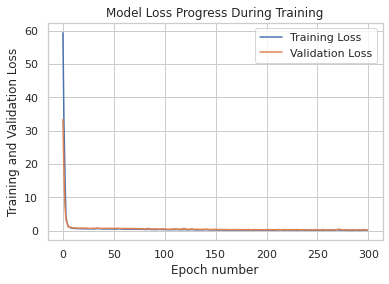

In [19]:
# plotting training loss vs validation loss

_ = plt.pyplot.plot(epochs_hist.history['loss'])
_ = plt.pyplot.plot(epochs_hist.history['val_loss'])
_ = plt.pyplot.title('Model Loss Progress During Training')
_ = plt.pyplot.ylabel('Training and Validation Loss')
_ = plt.pyplot.xlabel('Epoch number')
_ = plt.pyplot.legend(['Training Loss', 'Validation Loss'])

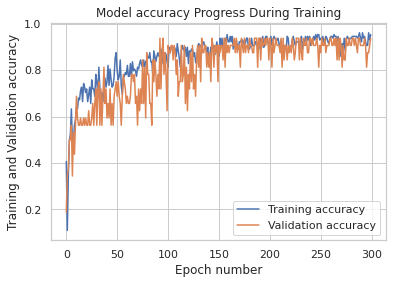

In [20]:
# plotting training accuracy vs validation accuracy

_ = plt.pyplot.plot(epochs_hist.history['accuracy'])
_ = plt.pyplot.plot(epochs_hist.history['val_accuracy'])
_ = plt.pyplot.title('Model accuracy Progress During Training')
_ = plt.pyplot.ylabel('Training and Validation accuracy')
_ = plt.pyplot.xlabel('Epoch number')
_ = plt.pyplot.legend(['Training accuracy', 'Validation accuracy'])

# Testing the model

In [21]:
# defining some colors/color name for better visualization
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [22]:
# importing multiple evaluation functions from scikit learn
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# predicting the classes corresponding to the test features
y_pred = model.predict(X_test)

In [24]:
# looking at the values of y_pred (probability for each class)
y_pred.round(1)

array([[0. , 0. , 0. , 1. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0.7, 0.3, 0. ],
       [0. , 0. , 0.9, 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0. , 0.7, 0.3],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0. , 0.8, 0.2],
       [0. , 1. , 0. , 0. ],
       [0. , 0.1, 0.8, 0.1],
       [0. , 0. , 1. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0.1, 0.9],
       [0. , 0.9, 0.1, 0. ]], dtype=float32)

In [25]:
# converting the hot encoded result into single digit class label
pred_labels = np.argmax(y_pred, axis=1) 


In [26]:
# looking at the test predicted label
pred_labels

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 3, 1])

In [27]:
# Printing test scores and report
print(bcolors.BOLD + bcolors.OKBLUE +'\n Test Accuracy: ' + bcolors.ENDC + bcolors.ENDC,
      accuracy_score(y_test, pred_labels))
print(bcolors.BOLD + bcolors.OKBLUE +'\n Classification Report: \n ' + bcolors.ENDC + bcolors.ENDC,
      classification_report(y_test, pred_labels))


 Test Accuracy:  0.9444444444444444

 Classification Report: 
                precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4

    accuracy                           0.94        18
   macro avg       0.96      0.95      0.95        18
weighted avg       0.95      0.94      0.94        18

